In [1]:
import numpy as np
import pandas as pd
from utils import build_delhi_df, build_chennai_df, build_AQI_time_graph, build_DiD_graph, build_DiD_model, build_monthly_df, build_dhaka_df
from scipy import stats

In [13]:
delhi_df = build_delhi_df(["2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

In [3]:
chennai_df = build_chennai_df(["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

In [4]:
dhaka_df = build_dhaka_df(["2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

In [5]:
monthly_delhi_df = build_monthly_df(delhi_df)
monthly_chennai_df = build_monthly_df(chennai_df)
monthly_dhaka_df = build_monthly_df(dhaka_df)

/home/saahas/Downloads/GitHub/PUBP-3042-Code/Final/models/utils.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['AQI'].resample('M').mean()
/home/saahas/Downloads/GitHub/PUBP-3042-Code/Final/models/utils.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['AQI'].resample('M').mean()
/home/saahas/Downloads/GitHub/PUBP-3042-Code/Final/models/utils.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['AQI'].resample('M').mean()


In [6]:
t_stat, p_value = stats.ttest_ind(monthly_dhaka_df["AQI"], monthly_delhi_df["AQI"])
print(f"p value: {p_value}")

p value: nan


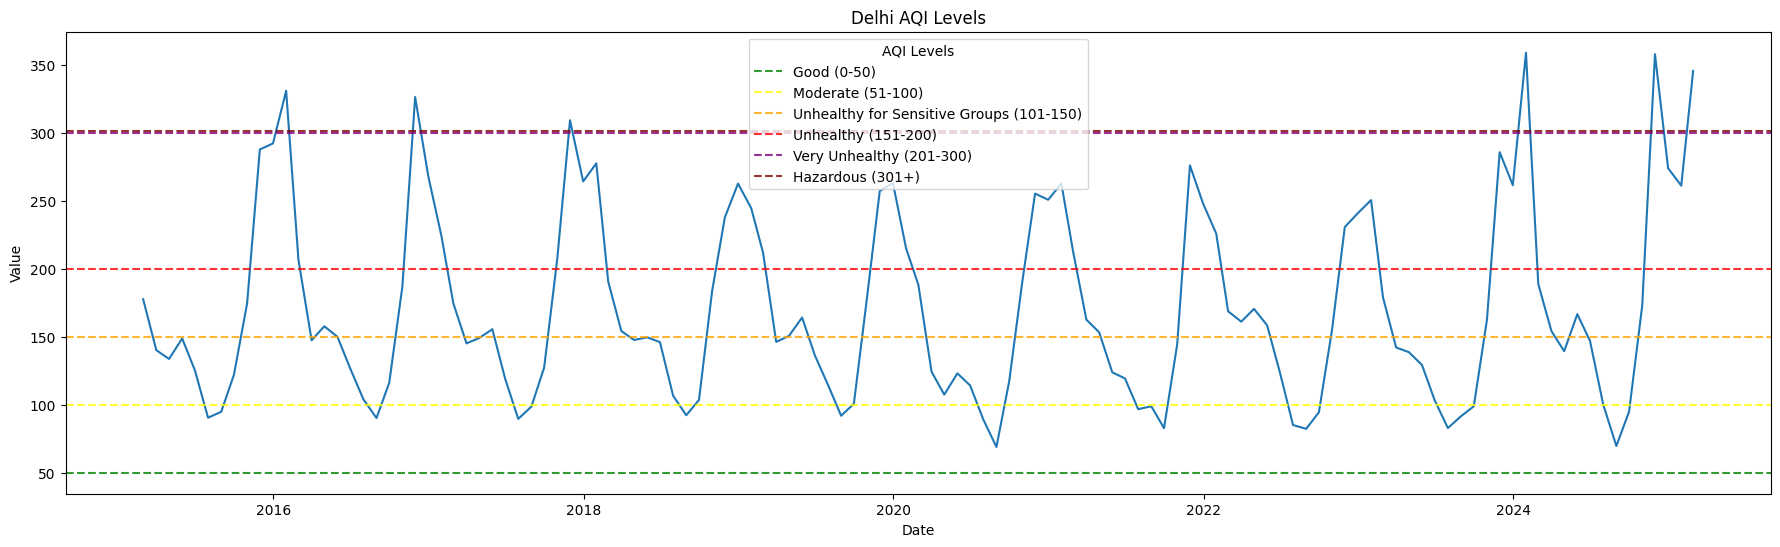

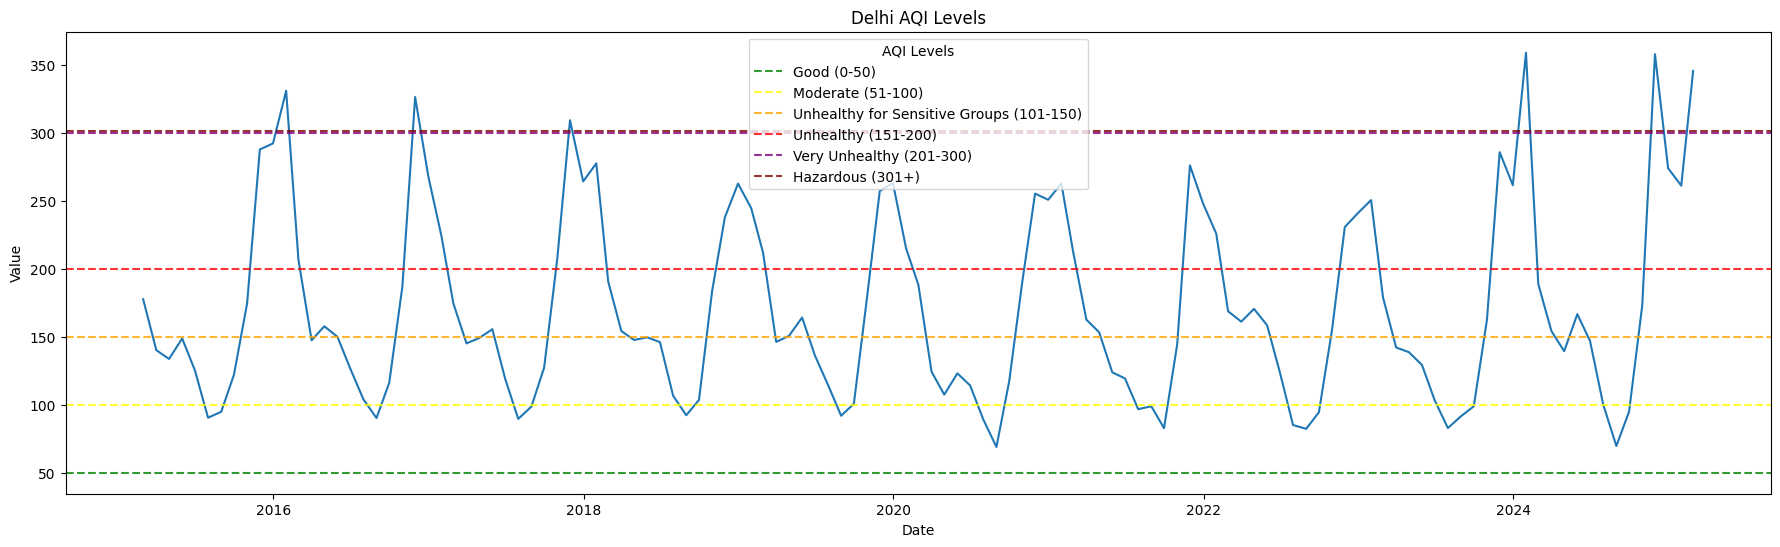

In [7]:
build_AQI_time_graph(monthly_delhi_df, "timestamp", "AQI", "Delhi AQI Levels", "delhi_aqi.png")

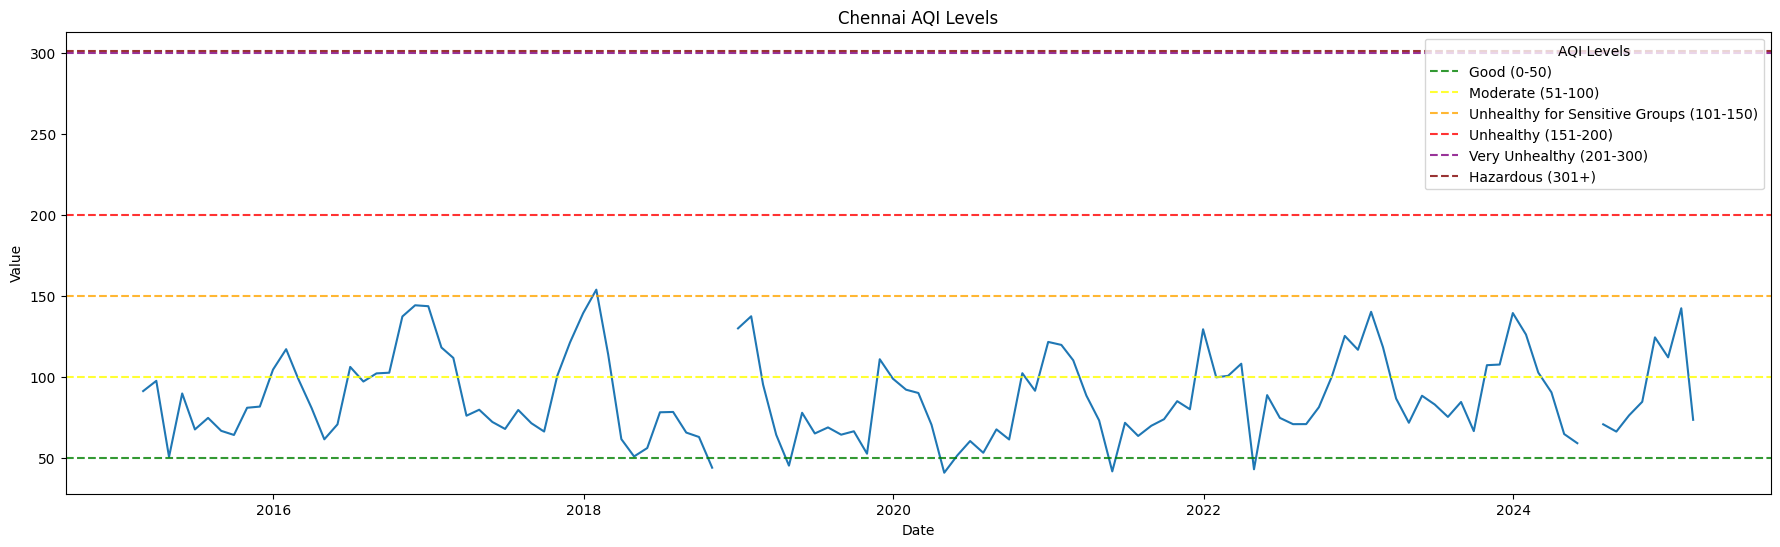

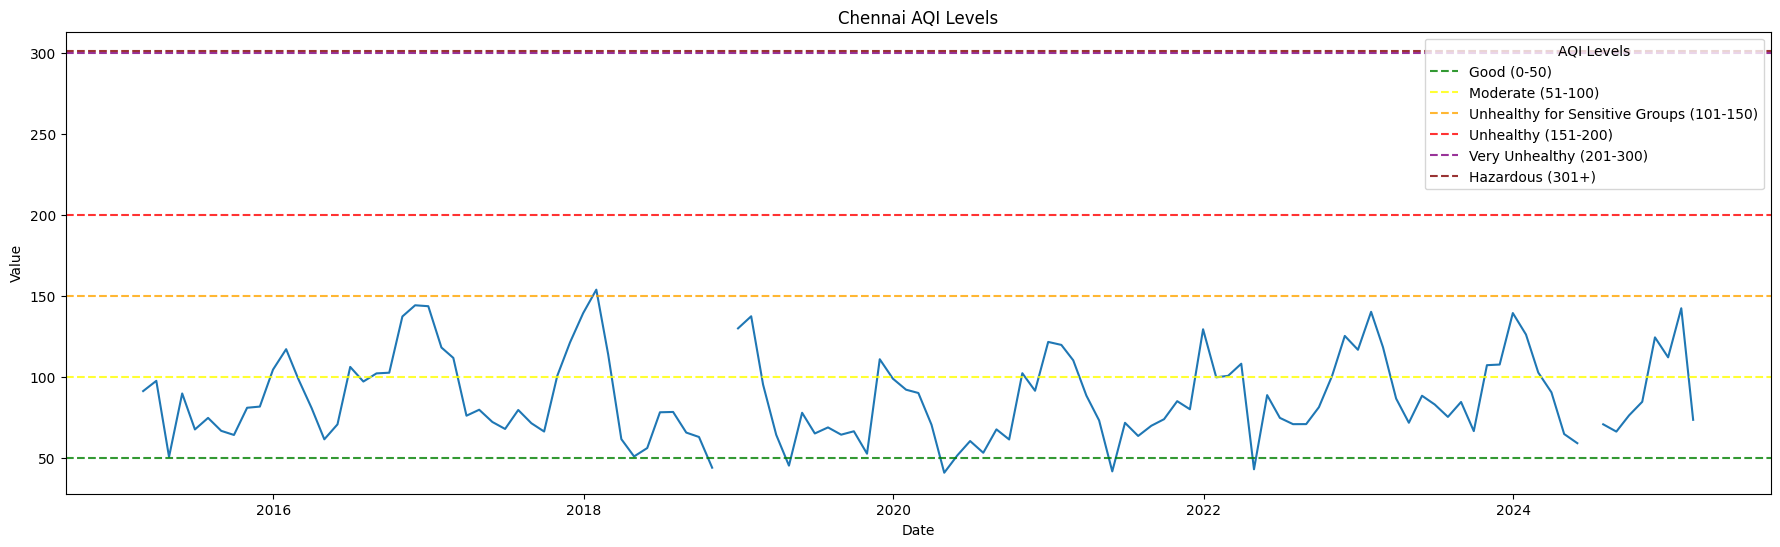

In [8]:
build_AQI_time_graph(monthly_chennai_df,"timestamp", "AQI", "Chennai AQI Levels", "chennai_aqi.png")

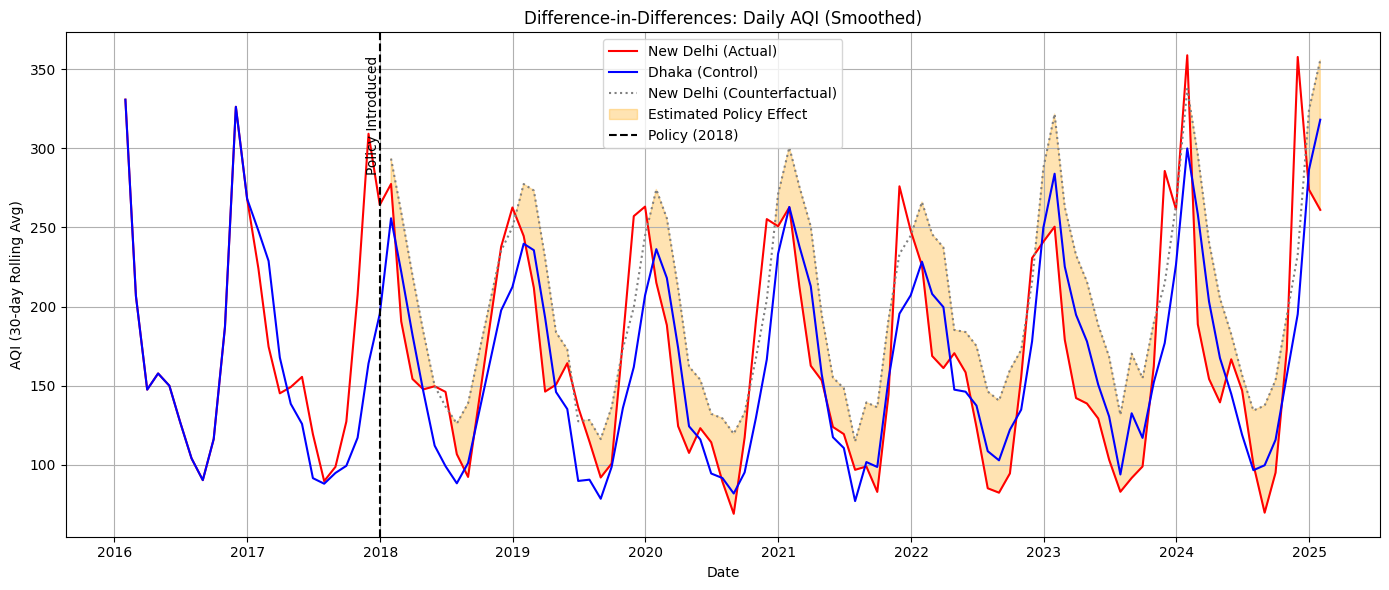

In [9]:
delhi_did_model = build_DiD_graph(monthly_delhi_df, monthly_dhaka_df, "timestamp", "delhi_did.png")
delhi_did_model

In [16]:
delhi_did = build_DiD_model(monthly_delhi_df, monthly_dhaka_df, "datetime")
monthly_delhi_df["AQI"].mean()

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.2017
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.895
Time:                        12:24:56   Log-Likelihood:                -1279.4
No. Observations:                 228   AIC:                             2567.
Df Residuals:                     224   BIC:                             2580.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    165.3940     13.629     12.135      0.0

np.float64(170.67626792333667)